# Plot the counts for an exciting-photon energy scan

First import the `EnergyScan` class and the class for processing the
"raw" detector data.

In [1]:
from agepy.spec.photons import EnergyScan, available_anodes

The available anodes can be viewed with

In [2]:
print(available_anodes)

{'poco': <class 'agepy.spec._anodes.PocoAnode'>, 'wsa': <class 'agepy.spec._anodes.WsaAnode'>, 'dld_xy': <class 'agepy.spec._anodes.DldAnodeXY'>, 'dld_uvw': <class 'agepy.spec._anodes.DldAnodeUVW'>, 'dld_uv': <class 'agepy.spec._anodes.DldAnodeUV'>, 'dld_uw': <class 'agepy.spec._anodes.DldAnodeUW'>, 'dld_vw': <class 'agepy.spec._anodes.DldAnodeVW'>, 'old_wsa': <class 'agepy.spec._anodes.Old_WsaAnode'>, 'old_dld': <class 'agepy.spec._anodes.Old_DldAnode'>}


You can access the anode using the dictionary or import it directly

In [3]:
from agepy.spec.photons import DldAnodeUVW

Create an instance of the chosen anode class with the detector rotation:

In [4]:
anode = DldAnodeUVW(-8.3)

Now load the energy scan data from a `.h5` file using the `EnergyScan` class:

In [5]:
scan = EnergyScan("scan.h5", anode, energies="epics#energy",
                  raw="dld_rd#raw", time_per_step=60,
                  target_density="Baratron#avg",
                  intensity_upstream="Mirror#avg")

The class needs the path to the file, the anode and the directories inside the `.h5` file, where the data is saved. In this case the scan energies are in `epics#energy/0`, the "raw" data in `dld_rd#raw/0`. Additionally, values for normalization can be loaded, if available. Here, a target density and the upstream intensity of the incoming photons was recorded and is loaded from their directories.

The directory structure in an `.h5` file can be viewed with `h5glance scan.h5`, after installing it with `pip install h5glance`.

The photon excitation spectrum can now be calculated and plotted with

In [6]:
n, err, energies = scan.counts(
    roi={"x": {"min": 0.25, "max": 0.80}, "y": {"min": 0.35, "max": 0.56}})

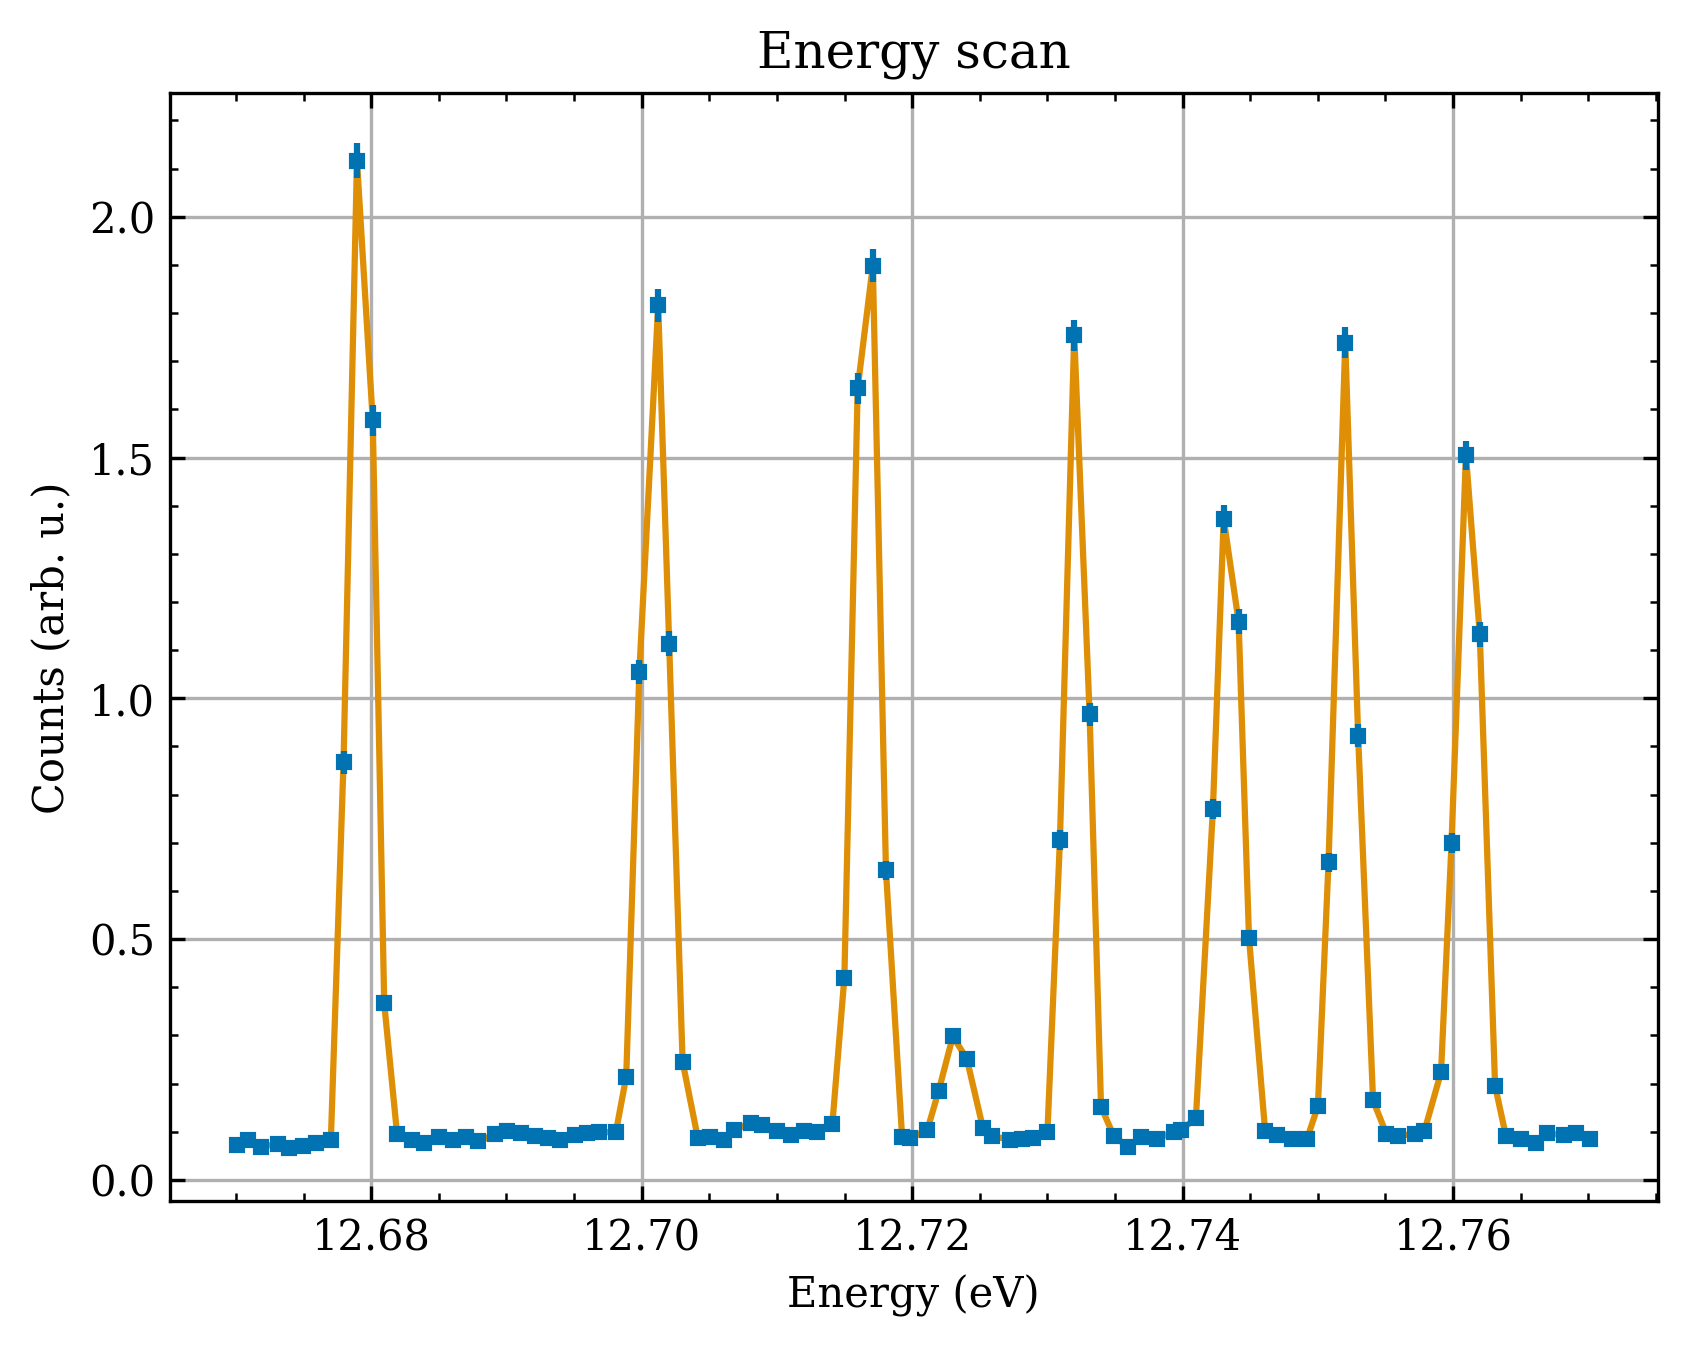

In [7]:
%matplotlib inline
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Set the agepy plotting style
from agepy import ageplot
ageplot.use("age")

fig, ax = plt.subplots()
# Scale the counts to a reasonable size
ax.plot(energies, n * 1e-10, '-', color=ageplot.colors[1])
ax.errorbar(energies, n * 1e-10, yerr=err * 1e-10, fmt='s', markersize=3,
            color=ageplot.colors[0])
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Counts (arb. u.)")
ax.set_title("Energy scan")
plt.show()